In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [295]:
df = pd.read_csv("dataset2.csv")
df.head()

,Ticker,Nama Perusahaan,Tanggal Listing,Sektor,Underwriter,Papan Pencatatan,Ownership,Listed Share,Persen Saham Ditawarkan,Rencana Penggunaan Dana IPO,...,Pendapatan,Laba Kotor,Laba Operasional/ Laba Usaha,Laba Berjalan (Bukan Komperhensif),Harga Final,1D %,1W %,1M %,6M %,1Y %
0,UNIQ,PT Ulima Nitra Tbk,8 Mar 2021,Energy,PT Surya Fajar Sekuritas,utama,lainnya,3138983000,"0,956",modal kerja,...,2.709260e+11,2.454700e+10,4.980000e+09,-5.617000e+09,118,35%,35%,5%,-25%,-30%
1,ARCI,PT Archi Indonesia Tbk,28 Jun 2021,Basic Materials,PT BNI Sekuritas; PT Mandiri Sekuritas; PT Cit...,pengembangan,konglomerat,24835000000,"0,15",bayar hutang,...,4.960332e+12,2.710668e+12,2.639656e+12,1.486734e+12,750,1%,0%,-8%,-27%,-54%
2,MASB,PT Bank Multiarta Sentosa Tbk,30 Jun 2021,Financials,PT BCA Sekuritas,pemantauan khusus,lainnya,1226902970,"0,15",modal kerja,...,1.212226e+12,4.313568e+11,1.688957e+11,1.081917e+11,3360,25%,3%,0%,5%,4%
3,BMHS,PT Bundamedik Tbk,6 Jul 2021,Healthcare,PT Ciptadana Sekuritas Asia,utama,konglomerat,8603416176,"0,0726",bayar hutang,...,1.148144e+12,NaN,NaN,1.184601e+11,340,25%,201%,203%,131%,74%
4,UVCR,PT Trimegah Karya Pratama Tbk,27 Jul 2021,Technology,PT Surya Fajar Sekuritas; PT Mirae Asset Sekur...,pengembangan,lainnya,2000000000,"0,25",modal belanja,...,1.944867e+11,4.634337e+09,NaN,5.434916e+08,100,10%,60%,374%,228%,43%


EDA & PREPROCESSING

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticker                              223 non-null    object 
 1   Nama Perusahaan                     223 non-null    object 
 2   Tanggal Listing                     223 non-null    object 
 3   Sektor                              223 non-null    object 
 4   Underwriter                         223 non-null    object 
 5   Papan Pencatatan                    223 non-null    object 
 6   Ownership                           223 non-null    object 
 7   Listed Share                        223 non-null    int64  
 8   Persen Saham Ditawarkan             223 non-null    object 
 9   Rencana Penggunaan Dana IPO         223 non-null    object 
 10  Valuation Currency                  223 non-null    object 
 11  Total Aset                          223 non-n

In [297]:
cols_to_float = ['Listed Share', 'Total Aset', 'Total Liabilitas', 'Pendapatan', 'Harga Final']
df[cols_to_float] = df[cols_to_float].astype(float)
df['Persen Saham Ditawarkan'] = df['Persen Saham Ditawarkan'].str.replace(',', '.').astype(float)

In [298]:
cols_percent = ['1D %', '1W %', '1M %', '6M %', '1Y %']
df[cols_percent] = df[cols_percent].replace('%', '', regex=True).astype(float)
df[cols_percent].dtypes

1D %    float64
1W %    float64
1M %    float64
6M %    float64
1Y %    float64
dtype: object

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ticker                              223 non-null    object 
 1   Nama Perusahaan                     223 non-null    object 
 2   Tanggal Listing                     223 non-null    object 
 3   Sektor                              223 non-null    object 
 4   Underwriter                         223 non-null    object 
 5   Papan Pencatatan                    223 non-null    object 
 6   Ownership                           223 non-null    object 
 7   Listed Share                        223 non-null    float64
 8   Persen Saham Ditawarkan             223 non-null    float64
 9   Rencana Penggunaan Dana IPO         223 non-null    object 
 10  Valuation Currency                  223 non-null    object 
 11  Total Aset                          223 non-n

In [300]:
df.isna().sum()

Ticker                                 0
Nama Perusahaan                        0
Tanggal Listing                        0
Sektor                                 0
Underwriter                            0
Papan Pencatatan                       0
Ownership                              0
Listed Share                           0
Persen Saham Ditawarkan                0
Rencana Penggunaan Dana IPO            0
Valuation Currency                     0
Total Aset                             0
Total Liabilitas                       0
Pendapatan                             2
Laba Kotor                             6
Laba Operasional/ Laba Usaha          86
Laba Berjalan (Bukan Komperhensif)    10
Harga Final                            0
1D %                                   0
1W %                                   0
1M %                                   2
6M %                                  18
1Y %                                  30
dtype: int64

In [301]:
column_to_impute = 'Laba Operasional/ Laba Usaha'

data_to_impute = df[[column_to_impute]].values

imputer = IterativeImputer(max_iter=10, random_state=0)

imputed_data = imputer.fit_transform(data_to_impute)

df[column_to_impute] = imputed_data

print("\nMissing values after imputation:")
print(df.isna().sum())


Missing values after imputation:
Ticker                                 0
Nama Perusahaan                        0
Tanggal Listing                        0
Sektor                                 0
Underwriter                            0
Papan Pencatatan                       0
Ownership                              0
Listed Share                           0
Persen Saham Ditawarkan                0
Rencana Penggunaan Dana IPO            0
Valuation Currency                     0
Total Aset                             0
Total Liabilitas                       0
Pendapatan                             2
Laba Kotor                             6
Laba Operasional/ Laba Usaha           0
Laba Berjalan (Bukan Komperhensif)    10
Harga Final                            0
1D %                                   0
1W %                                   0
1M %                                   2
6M %                                  18
1Y %                                  30
dtype: int64


In [302]:
df = df.dropna(subset=['Pendapatan', 'Laba Kotor', 'Laba Berjalan (Bukan Komperhensif)'])
print("\nMissing values after cleaning:")
print(df.isna().sum())


Missing values after cleaning:
Ticker                                 0
Nama Perusahaan                        0
Tanggal Listing                        0
Sektor                                 0
Underwriter                            0
Papan Pencatatan                       0
Ownership                              0
Listed Share                           0
Persen Saham Ditawarkan                0
Rencana Penggunaan Dana IPO            0
Valuation Currency                     0
Total Aset                             0
Total Liabilitas                       0
Pendapatan                             0
Laba Kotor                             0
Laba Operasional/ Laba Usaha           0
Laba Berjalan (Bukan Komperhensif)     0
Harga Final                            0
1D %                                   0
1W %                                   0
1M %                                   2
6M %                                  17
1Y %                                  28
dtype: int64


In [303]:
# Underwriters

freq_dict = {}
aset_dict = {}
jumlah_dict = {}

underwriter_freq = []
underwriter_aset = []
underwriter_jumlah = []

for idx, row in df.iterrows():
    underwriters = [u.strip() for u in row['Underwriter'].split(';') if u.strip()]
    uw = underwriters[0]  

    persen = row['Persen Saham Ditawarkan']

    listed_share = row['Listed Share']
    harga_final = row['Harga Final']
    total_aset = row['Total Aset']
    jumlah = listed_share * harga_final * persen

    for uw_name in underwriters:
        freq_dict[uw_name] = freq_dict.get(uw_name, 0) + 1
        aset_dict[uw_name] = aset_dict.get(uw_name, 0.0) + total_aset
        jumlah_dict[uw_name] = jumlah_dict.get(uw_name, 0.0) + jumlah

    underwriter_freq.append(freq_dict[uw])
    underwriter_aset.append(aset_dict[uw])
    underwriter_jumlah.append(jumlah_dict[uw])

df['underwriter_freq'] = underwriter_freq
df['underwriter_aset'] = underwriter_aset
df['underwriter_jumlah'] = underwriter_jumlah

df[['Underwriter', 'underwriter_freq', 'underwriter_aset', 'underwriter_jumlah']].head()

,Underwriter,underwriter_freq,underwriter_aset,underwriter_jumlah
0,PT Surya Fajar Sekuritas,1,5.396730e+11,3.541024e+11
1,PT BNI Sekuritas; PT Mandiri Sekuritas; PT Cit...,1,9.084013e+12,2.793938e+12
2,PT BCA Sekuritas,1,2.153794e+13,6.183591e+11
4,PT Surya Fajar Sekuritas; PT Mirae Asset Sekur...,2,5.848703e+11,4.041024e+11
5,PT RHB Sekuritas Indonesia,1,3.842964e+11,1.575750e+11


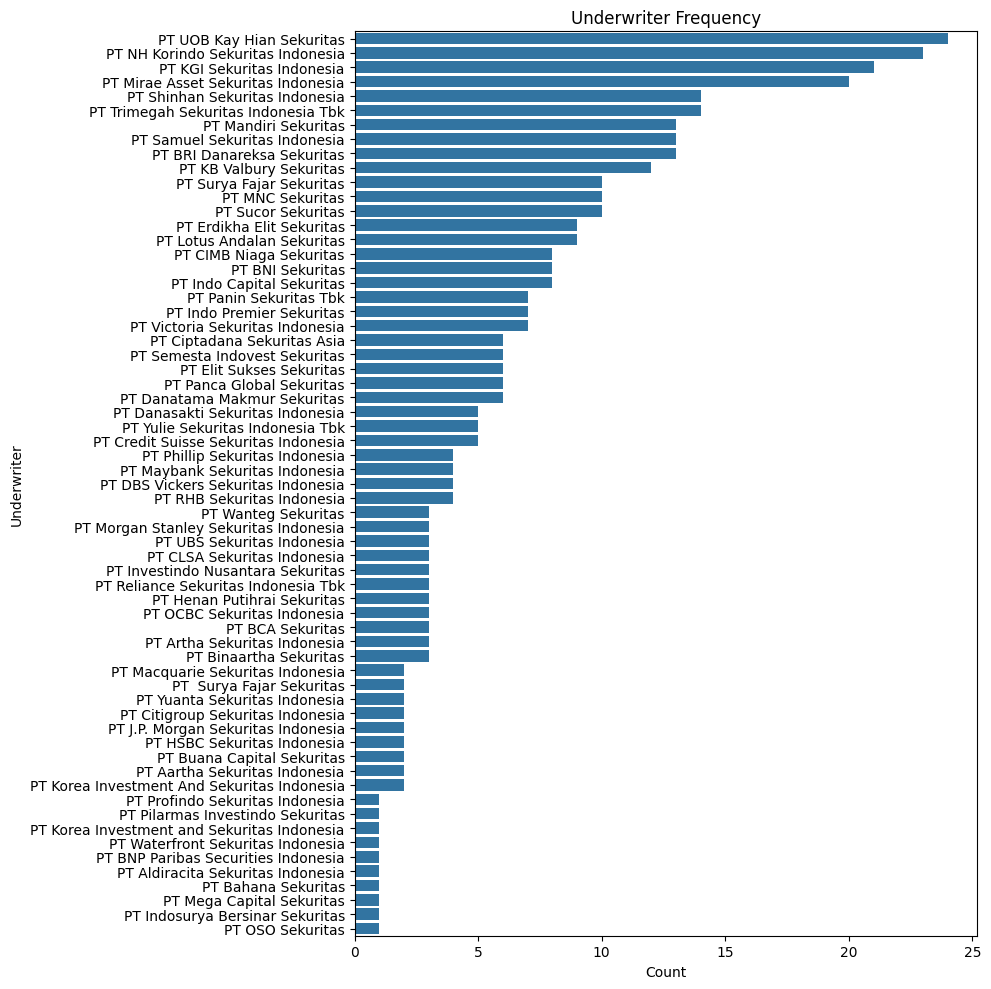

In [304]:
underwriters_exploded = df['Underwriter'].str.split(';').explode().str.strip()
plt.figure(figsize=(10, 10))
sns.countplot(y=underwriters_exploded, order=underwriters_exploded.value_counts().index)
plt.ylabel('Underwriter')
plt.xlabel('Count')
plt.title('Underwriter Frequency')
plt.tight_layout()
plt.show()

In [305]:
sorted(underwriters_exploded.unique())

['PT  Surya Fajar Sekuritas',
 'PT Aartha Sekuritas Indonesia',
 'PT Aldiracita Sekuritas Indonesia',
 'PT Artha Sekuritas Indonesia',
 'PT BCA Sekuritas',
 'PT BNI Sekuritas',
 'PT BNP Paribas Securities Indonesia',
 'PT BRI Danareksa Sekuritas',
 'PT Bahana Sekuritas',
 'PT Binaartha Sekuritas',
 'PT Buana Capital Sekuritas',
 'PT CIMB Niaga Sekuritas',
 'PT CLSA Sekuritas Indonesia',
 'PT Ciptadana Sekuritas Asia',
 'PT Citigroup Sekuritas Indonesia',
 'PT Credit Suisse Sekuritas Indonesia',
 'PT DBS Vickers Sekuritas Indonesia',
 'PT Danasakti Sekuritas Indonesia',
 'PT Danatama Makmur Sekuritas',
 'PT Elit Sukses Sekuritas',
 'PT Erdikha Elit Sekuritas',
 'PT HSBC Sekuritas Indonesia',
 'PT Henan Putihrai Sekuritas',
 'PT Indo Capital Sekuritas',
 'PT Indo Premier Sekuritas',
 'PT Indosurya Bersinar Sekuritas',
 'PT Investindo Nusantara Sekuritas',
 'PT J.P. Morgan Sekuritas Indonesia',
 'PT KB Valbury Sekuritas',
 'PT KGI Sekuritas Indonesia',
 'PT Korea Investment And Sekuritas 

In [306]:
df['Underwriter'] = df['Underwriter'].str.split(';').str[0].str.strip()

In [307]:
df = df.drop(df.columns[:2], axis=1)

In [308]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Rainy'
    elif month in [3, 4, 5]:
        return 'Dry Early'
    elif month in [6, 7, 8]:
        return 'Dry Peak'
    elif month in [9, 10, 11]:
        return 'Dry Late'
    else:
        return 'Unknown'
        
df['Listing Month'] = pd.to_datetime(df['Tanggal Listing'], format='%d %b %Y').dt.month
df['Listing Season'] = df['Listing Month'].apply(month_to_season)
df = df.drop(columns=['Listing Month', 'Tanggal Listing'])
df['Listing Season'].value_counts()

Listing Season
Rainy        70
Dry Peak     56
Dry Late     43
Dry Early    37
Name: count, dtype: int64

In [309]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    if col != 'Underwriter':
        print(f"{col}:")
        print(df[col].unique())
        print('-' * 40)

Sektor:
['Energy' 'Basic Materials' 'Financials' 'Technology'
 'Transportation & Logistic' 'Consumer Non-Cyclicals' 'Industrials'
 'Healthcare' 'Consumer Cyclicals' 'Infrastructures'
 'Properties & Real Estate']
----------------------------------------
Papan Pencatatan:
['utama' 'pengembangan' 'pemantauan khusus' 'akselerasi' 'ekonomi baru']
----------------------------------------
Ownership:
['lainnya' 'konglomerat' 'start up' 'bumn']
----------------------------------------
Rencana Penggunaan Dana IPO:
['modal kerja' 'bayar hutang' 'modal belanja' 'ekspansi' 'belanja modal']
----------------------------------------
Valuation Currency:
['rupiah' 'usd']
----------------------------------------
Listing Season:
['Dry Early' 'Dry Peak' 'Dry Late' 'Rainy']
----------------------------------------


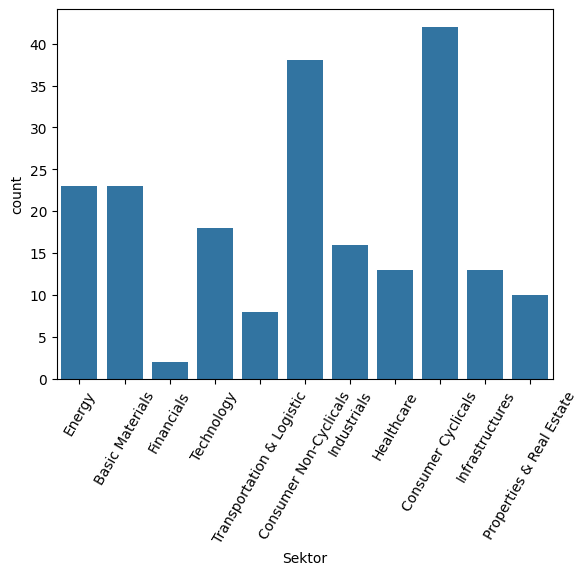

In [310]:
sns.countplot(data=df, x='Sektor')
plt.xticks(rotation=60)
plt.show()

In [311]:
df['EPS'] = df['Laba Berjalan (Bukan Komperhensif)'] / df['Listed Share']
df['RPS'] = df['Pendapatan'] / df['Listed Share']
df['solvency'] = df['Total Liabilitas'] / df['Total Aset']
df['equity'] = df['Total Aset'] - df['Total Liabilitas']

df['ROA'] = df['Laba Berjalan (Bukan Komperhensif)'] / df['Total Aset']
df['ROE'] = df['Laba Berjalan (Bukan Komperhensif)'] / df['equity']
df['GPM'] = df['Laba Kotor'] / df['Pendapatan']
df['OPM'] = df['Laba Operasional/ Laba Usaha'] / df['Pendapatan']
df['NPM'] = df['Laba Berjalan (Bukan Komperhensif)'] / df['Pendapatan']

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 222
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Sektor                              206 non-null    object 
 1   Underwriter                         206 non-null    object 
 2   Papan Pencatatan                    206 non-null    object 
 3   Ownership                           206 non-null    object 
 4   Listed Share                        206 non-null    float64
 5   Persen Saham Ditawarkan             206 non-null    float64
 6   Rencana Penggunaan Dana IPO         206 non-null    object 
 7   Valuation Currency                  206 non-null    object 
 8   Total Aset                          206 non-null    float64
 9   Total Liabilitas                    206 non-null    float64
 10  Pendapatan                          206 non-null    float64
 11  Laba Kotor                          206 non-null  

In [313]:
cols_to_move = df.columns[14:20].tolist()
df = df[[col for col in df.columns if col not in cols_to_move] + cols_to_move]
df.head()

,Sektor,Underwriter,Papan Pencatatan,Ownership,Listed Share,Persen Saham Ditawarkan,Rencana Penggunaan Dana IPO,Valuation Currency,Total Aset,Total Liabilitas,...,ROE,GPM,OPM,NPM,Harga Final,1D %,1W %,1M %,6M %,1Y %
0,Energy,PT Surya Fajar Sekuritas,utama,lainnya,3.138983e+09,0.956,modal kerja,rupiah,5.396730e+11,2.674160e+11,...,-0.020631,0.090604,0.018381,-0.020733,118.0,35.0,35.0,5.0,-25.0,-30.0
1,Basic Materials,PT BNI Sekuritas,pengembangan,konglomerat,2.483500e+10,0.150,bayar hutang,usd,9.084013e+12,6.859419e+12,...,0.668317,0.546469,0.532153,0.299725,750.0,1.0,0.0,-8.0,-27.0,-54.0
2,Financials,PT BCA Sekuritas,pemantauan khusus,lainnya,1.226903e+09,0.150,modal kerja,rupiah,2.153794e+13,1.964810e+13,...,0.057249,0.355839,0.139327,0.089250,3360.0,25.0,3.0,0.0,5.0,4.0
4,Technology,PT Surya Fajar Sekuritas,pengembangan,lainnya,2.000000e+09,0.250,modal belanja,rupiah,4.519733e+10,1.435880e+10,...,0.017624,0.023829,1.473526,0.002794,100.0,10.0,60.0,374.0,228.0,43.0
5,Transportation & Logistic,PT RHB Sekuritas Indonesia,pengembangan,konglomerat,2.626250e+09,0.200,modal belanja,rupiah,3.842964e+11,1.319991e+11,...,0.031241,0.198594,0.110745,0.101345,300.0,25.0,-3.0,-12.0,-19.0,-19.0


In [314]:
df.iloc[:, -5:].describe()

,1D %,1W %,1M %,6M %,1Y %
count,206.000000,206.000000,204.000000,189.000000,178.000000
mean,15.645631,32.500000,43.960784,36.883598,46.438202
std,16.881384,65.666099,121.030300,179.859127,295.902219
min,-35.000000,-56.000000,-72.000000,-78.000000,-92.000000
25%,2.000000,-5.750000,-12.250000,-42.000000,-50.000000
50%,17.000000,12.000000,8.500000,-7.000000,-22.500000
75%,34.000000,46.000000,66.000000,41.000000,35.000000
max,35.000000,280.000000,1085.000000,1525.000000,3014.000000


In [315]:
def categorize_1d_1w(val):
    if val >= 10:
        return 'good'
    elif val <= -10:
        return 'bad'
    else:
        return 'normal'

def categorize_return(val):
    if val >= 25:
        return 'very good'
    elif val >= 10:
        return 'good'
    elif val >= -5:
        return 'normal'
    elif val >= -20:
        return 'bad'
    else:
        return 'very bad'
    

for col in ['1D %', '1W %']:
    df[col] = df[col].apply(categorize_1d_1w)

for col in ['1M %', '6M %', '1Y %']:
    df[col] = df[col].apply(categorize_1d_1w)

In [316]:
label_encoders = {}
encoded_mappings = {}
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    encoded_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

for col, mapping in encoded_mappings.items():
    print(f"Encoding for '{col}':")
    print(mapping)
    print('-' * 40)

Encoding for 'Sektor':
{'Basic Materials': 0, 'Consumer Cyclicals': 1, 'Consumer Non-Cyclicals': 2, 'Energy': 3, 'Financials': 4, 'Healthcare': 5, 'Industrials': 6, 'Infrastructures': 7, 'Properties & Real Estate': 8, 'Technology': 9, 'Transportation & Logistic': 10}
----------------------------------------
Encoding for 'Underwriter':
{'PT  Surya Fajar Sekuritas': 0, 'PT Aartha Sekuritas Indonesia': 1, 'PT Artha Sekuritas Indonesia': 2, 'PT BCA Sekuritas': 3, 'PT BNI Sekuritas': 4, 'PT BNP Paribas Securities Indonesia': 5, 'PT BRI Danareksa Sekuritas': 6, 'PT Binaartha Sekuritas': 7, 'PT Buana Capital Sekuritas': 8, 'PT CIMB Niaga Sekuritas': 9, 'PT CLSA Sekuritas Indonesia': 10, 'PT Ciptadana Sekuritas Asia': 11, 'PT Danatama Makmur Sekuritas': 12, 'PT Elit Sukses Sekuritas': 13, 'PT Erdikha Elit Sekuritas': 14, 'PT Henan Putihrai Sekuritas': 15, 'PT Indo Capital Sekuritas': 16, 'PT Indo Premier Sekuritas': 17, 'PT Investindo Nusantara Sekuritas': 18, 'PT KB Valbury Sekuritas': 19, 'P

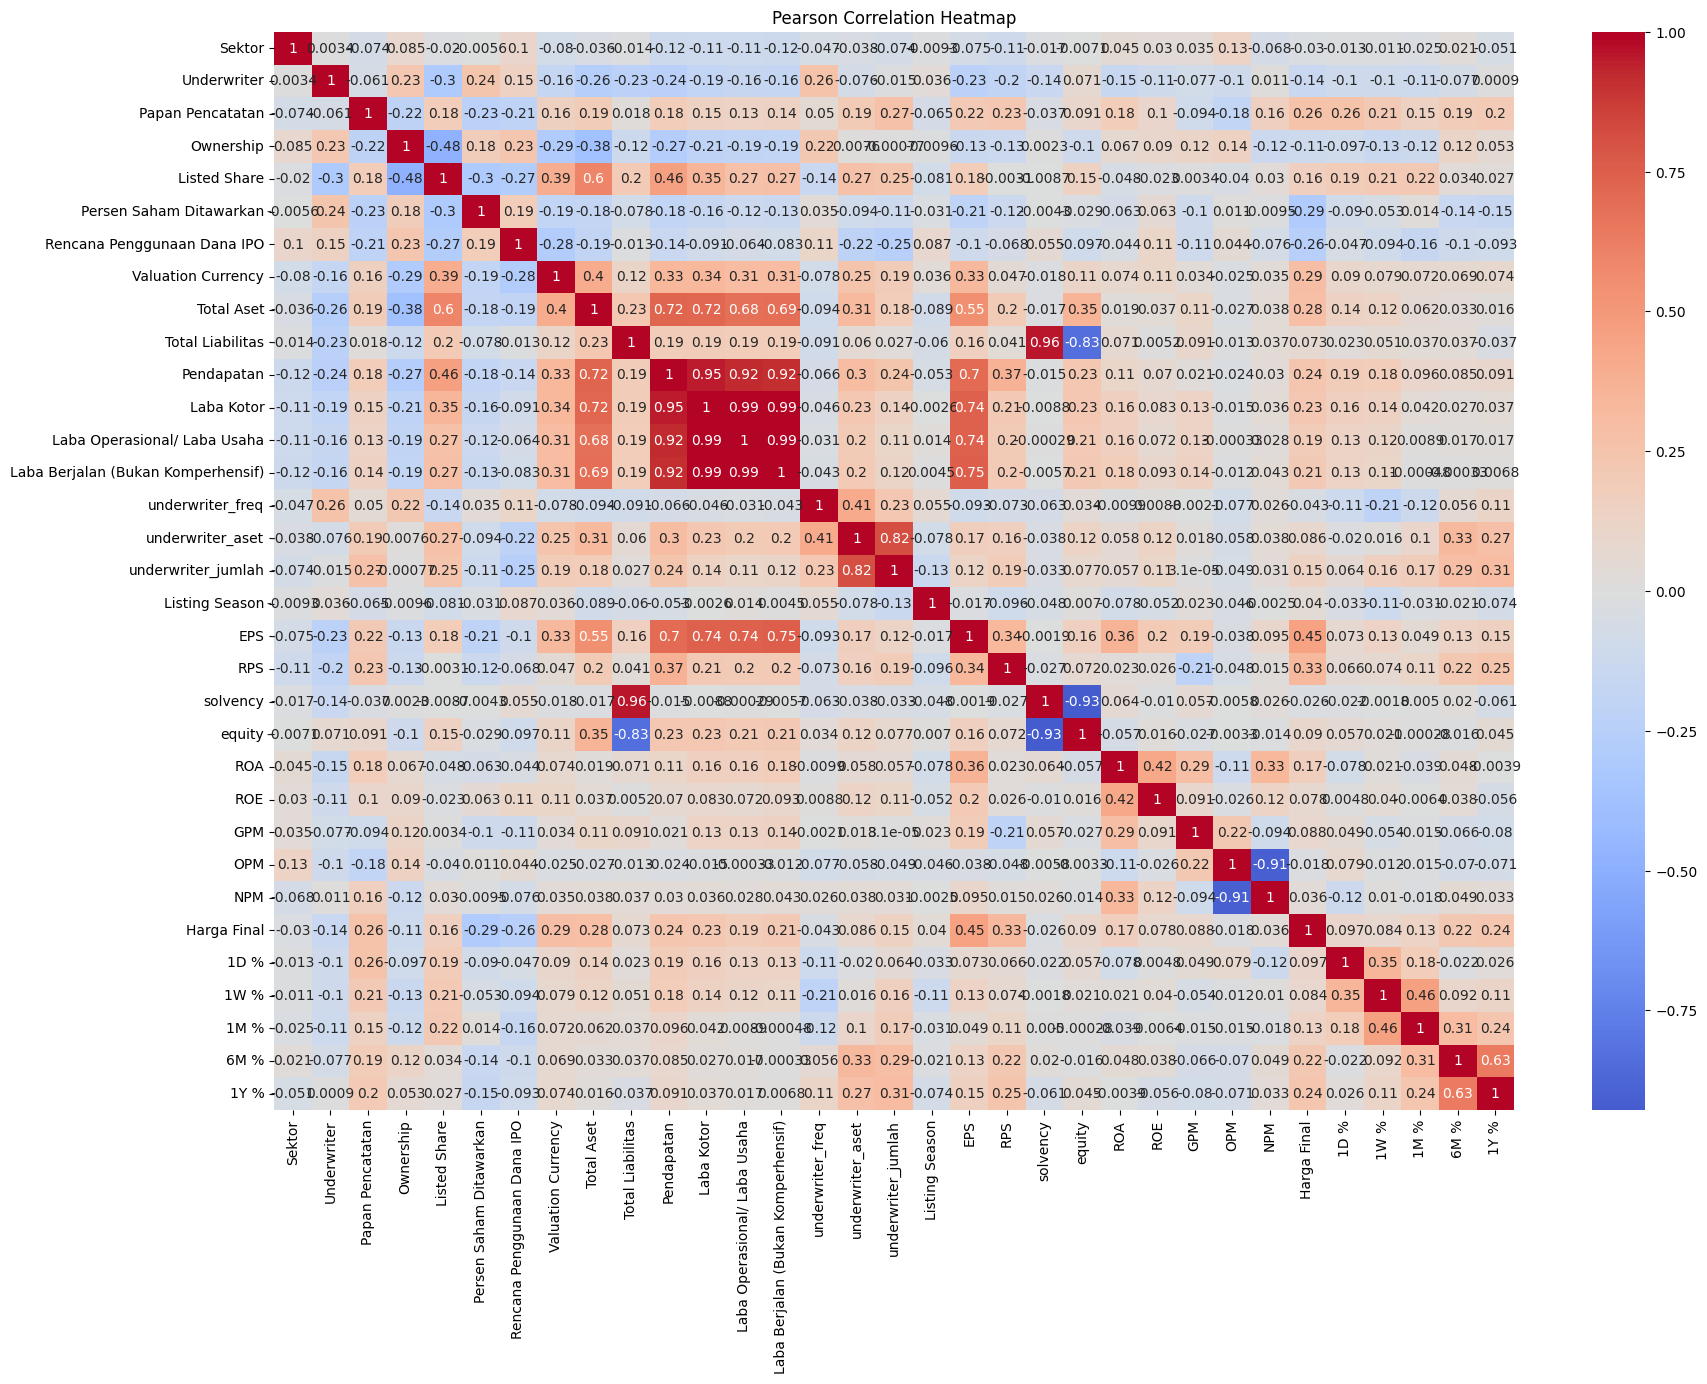

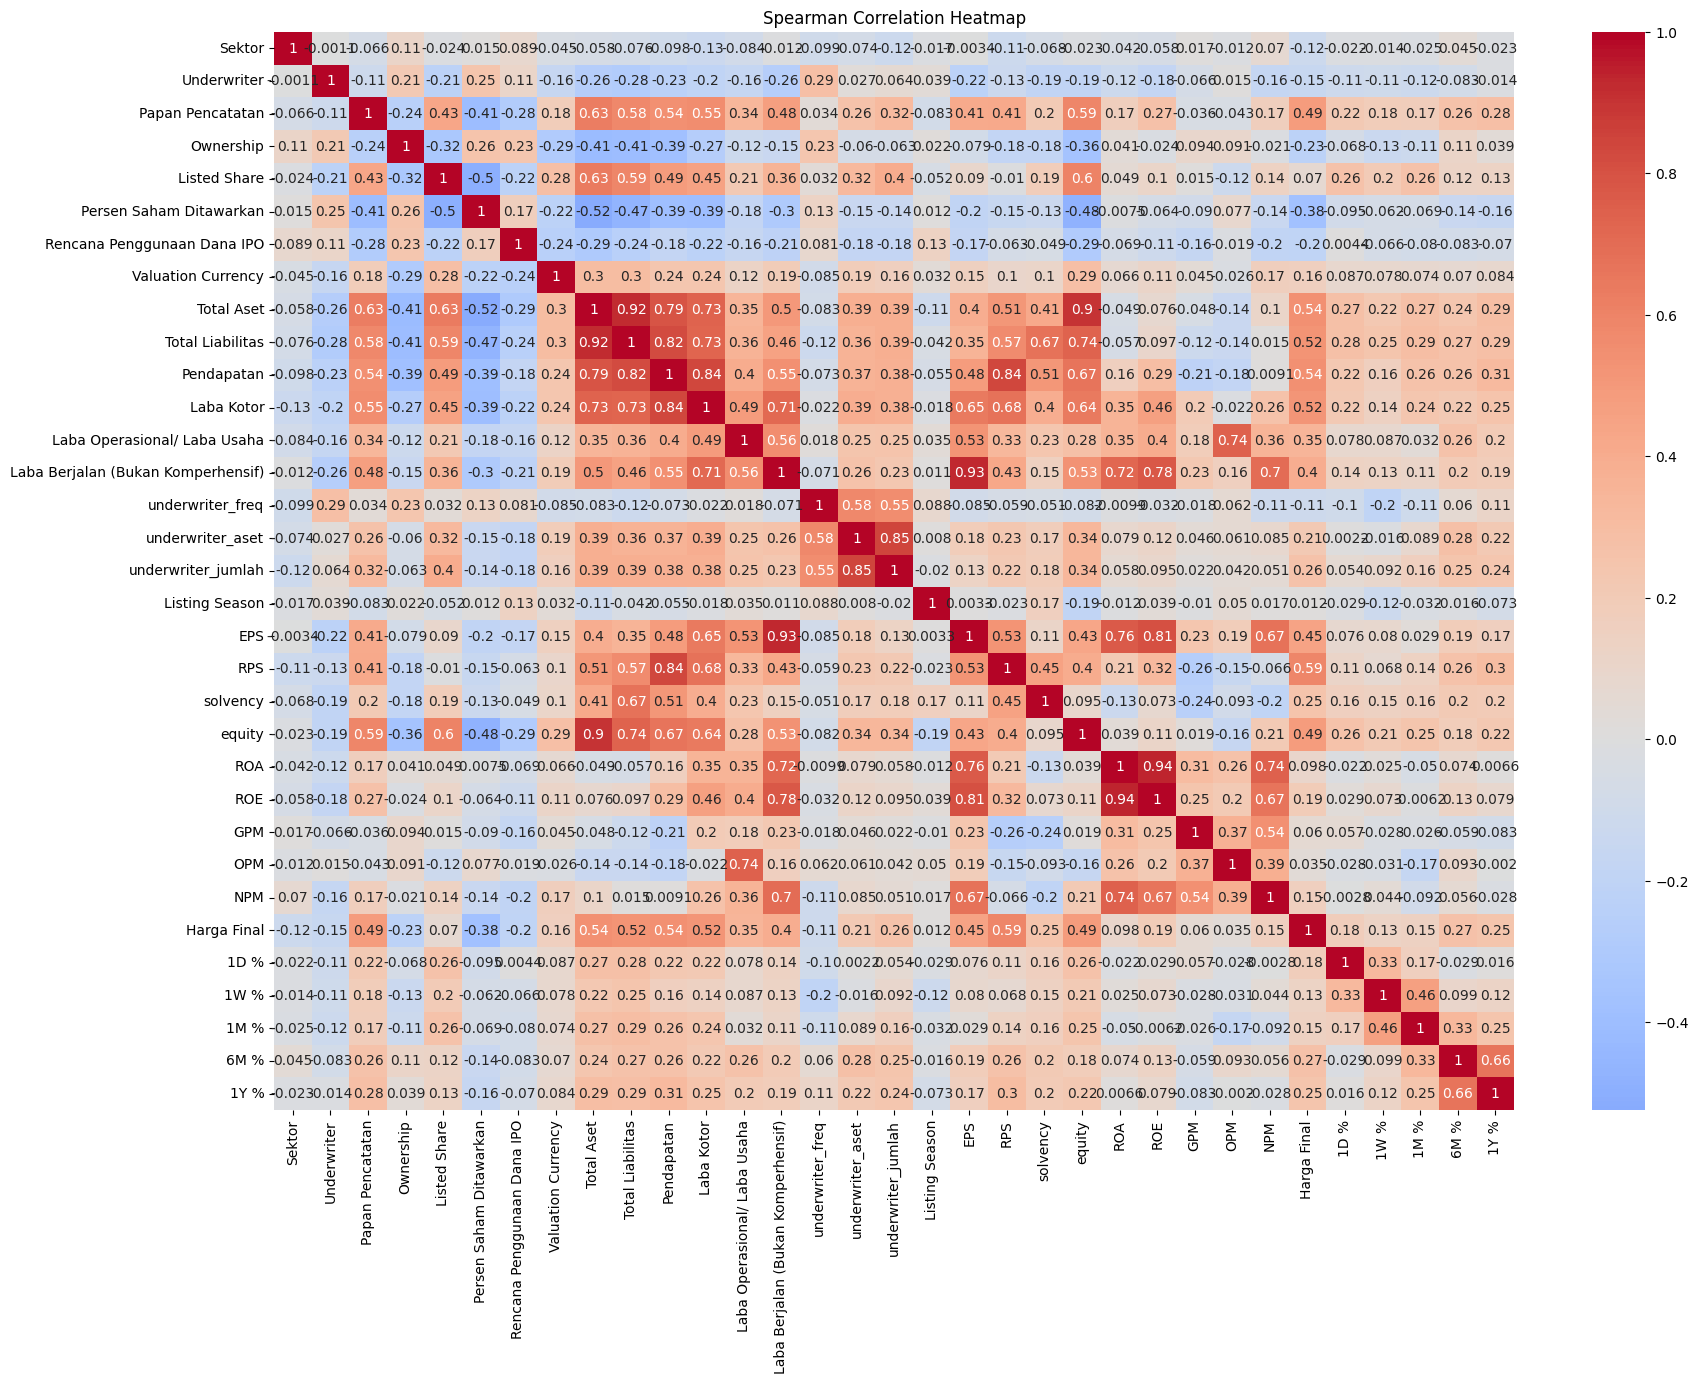

In [317]:
# Pearson correlation heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.2g', cmap='coolwarm', center=0)
plt.title('Pearson Correlation Heatmap')
plt.show()

# Spearman correlation heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2g', cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap')
plt.show()

In [318]:
target_cols = df.columns[-6:]

correlations = df.corr()[target_cols]

for target in target_cols:
    print(f"\nCorrelation ranking for target: {target}")
    non_target_cols = [col for col in correlations.index if col not in target_cols]
    ranked = correlations.loc[non_target_cols, target].abs().sort_values(ascending=False).head(10)
    print(ranked)


Correlation ranking for target: Harga Final
EPS                                   0.451262
RPS                                   0.328336
Valuation Currency                    0.292895
Persen Saham Ditawarkan               0.289888
Total Aset                            0.280749
Rencana Penggunaan Dana IPO           0.256261
Papan Pencatatan                      0.256171
Pendapatan                            0.236338
Laba Kotor                            0.225101
Laba Berjalan (Bukan Komperhensif)    0.209400
Name: Harga Final, dtype: float64

Correlation ranking for target: 1D %
Papan Pencatatan                      0.255637
Pendapatan                            0.191141
Listed Share                          0.188345
Laba Kotor                            0.156630
Total Aset                            0.138309
Laba Berjalan (Bukan Komperhensif)    0.131389
Laba Operasional/ Laba Usaha          0.127685
NPM                                   0.115605
underwriter_freq                     